<a href="https://colab.research.google.com/github/1jamjam/Data-Science---Python-/blob/main/Forecasting_Practice_(Prophet)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('sales.csv')

In [ ]:
df.head()

,Unnamed: 0,Date,Sales
0,0,2021-10-01,29.109547
1,1,2021-10-02,30.720435
2,2,2021-10-03,30.305173
3,3,2021-10-04,27.390893
4,4,2021-10-05,22.841123


In [ ]:
#df = df.drop("Unnamed: 0", axis = 1)
df.head()

,Date,Sales
0,2021-10-01,29.109547
1,2021-10-02,30.720435
2,2021-10-03,30.305173
3,2021-10-04,27.390893
4,2021-10-05,22.841123


In [ ]:
df.dtypes

,0
Date,object
Sales,float64


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

,0
Date,datetime64[ns]
Sales,float64


In [ ]:
df.head()

,Date,Sales
0,2021-10-01,29.109547
1,2021-10-02,30.720435
2,2021-10-03,30.305173
3,2021-10-04,27.390893
4,2021-10-05,22.841123


In [ ]:
df.describe()

,Date,Sales
count,365,365.000000
mean,2022-03-31 23:59:59.999999744,34.093942
min,2021-10-01 00:00:00,19.002444
25%,2021-12-31 00:00:00,29.290376
50%,2022-04-01 00:00:00,33.971567
75%,2022-07-01 00:00:00,38.647294
max,2022-09-30 00:00:00,48.190967
std,NaN,6.572683


In [ ]:
df.isnull().sum()

,0
Date,0
Sales,0


<Axes: xlabel='Date', ylabel='Sales'>

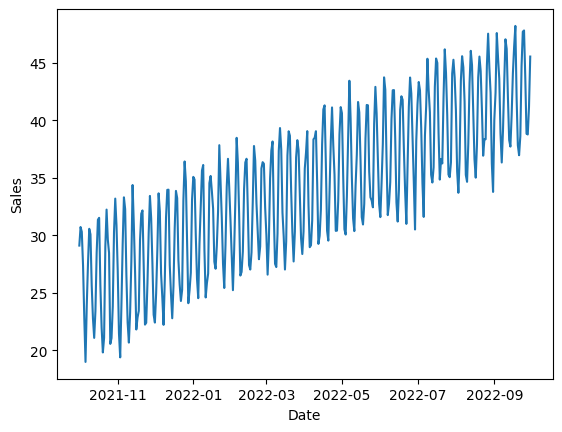

In [ ]:
sns.lineplot(x = "Date", y = "Sales", data = df)

In [ ]:
df = df.rename(columns = {'Date': 'ds', "Sales": "y"})

In [ ]:
df

,ds,y
0,2021-10-01,29.109547
1,2021-10-02,30.720435
2,2021-10-03,30.305173
3,2021-10-04,27.390893
4,2021-10-05,22.841123
...,...,...
360,2022-09-26,43.698457
361,2022-09-27,38.827336
362,2022-09-28,38.761570
363,2022-09-29,41.144471


In [ ]:
split_date = "2022-07-15"
df['ds'] = pd.to_datetime(df['ds'])
df_train = df.loc[df['ds'] <= split_date].copy()
df_test = df.loc[df['ds'] > split_date].copy()

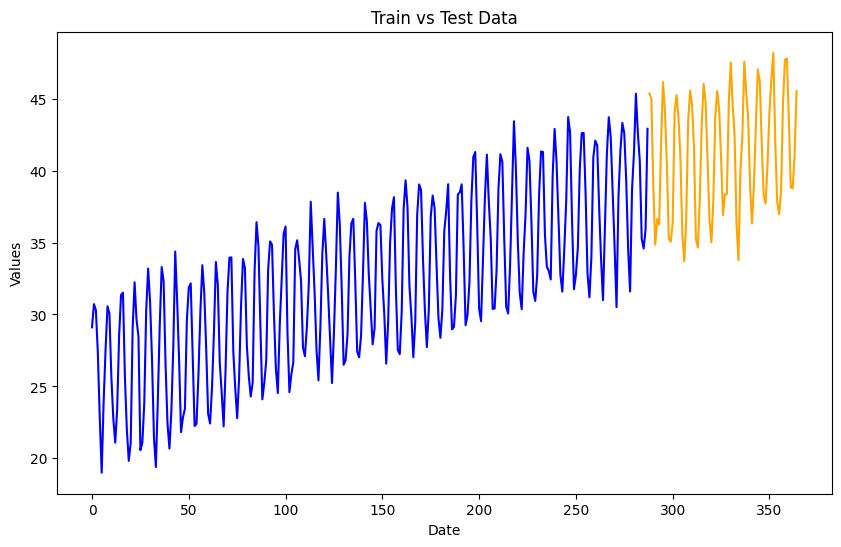

In [ ]:
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(df_train['y'], label='Train Data', color='blue')

# Plot the test data
plt.plot(df_test['y'], label='Test Data', color='orange')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Train vs Test Data')

plt.show()

In [ ]:
model = Prophet()
model.fit(df_train)

df_test_fcst = model.predict(df_test)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5za47opq/3e05bwv9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5za47opq/gap95h31.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15577', 'data', 'file=/tmp/tmp5za47opq/3e05bwv9.json', 'init=/tmp/tmp5za47opq/gap95h31.json', 'output', 'file=/tmp/tmp5za47opq/prophet_modelww0tbgn7/prophet_model-20241113165759.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:57:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:57:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
df_test_fcst.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-07-16,39.274671,43.600277,45.997896,39.274671,39.274671,5.516427,5.516427,5.516427,5.516427,5.516427,5.516427,0.0,0.0,0.0,44.791098
1,2022-07-17,39.324255,42.570365,45.058463,39.324255,39.324255,4.451867,4.451867,4.451867,4.451867,4.451867,4.451867,0.0,0.0,0.0,43.776123
2,2022-07-18,39.373840,38.205850,40.633581,39.373277,39.374216,-0.054111,-0.054111,-0.054111,-0.054111,-0.054111,-0.054111,0.0,0.0,0.0,39.319728
3,2022-07-19,39.423424,34.070543,36.385130,39.421983,39.424532,-4.259720,-4.259720,-4.259720,-4.259720,-4.259720,-4.259720,0.0,0.0,0.0,35.163704
4,2022-07-20,39.473008,32.792745,35.128500,39.470649,39.475087,-5.508992,-5.508992,-5.508992,-5.508992,-5.508992,-5.508992,0.0,0.0,0.0,33.964016


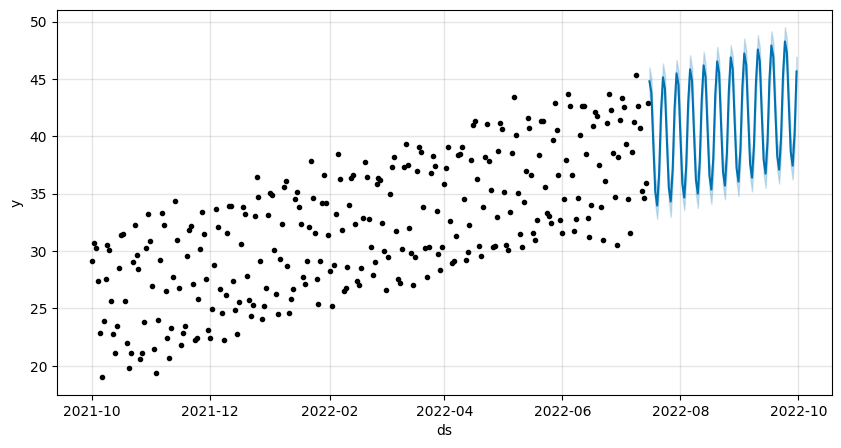

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
fig = model.plot(df_test_fcst, ax=ax)
plt.show()


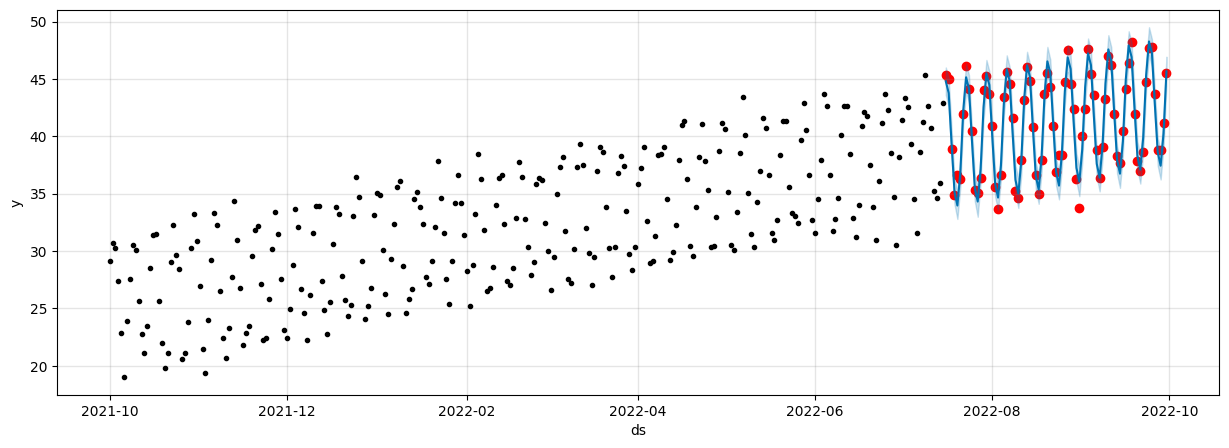

In [ ]:
f, ax = plt.subplots(figsize=(15,5))
# Use the index of the DataFrame as the x-axis values
ax.scatter(df_test['ds'], df_test['y'], color = 'r')
fig = model.plot(df_test_fcst, ax=ax)

In [ ]:
# Evaluating the model using Error Metrics

#Mean Squared Error
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np

np.sqrt(mean_squared_error(y_true=df_test['y'],
                           y_pred = df_test_fcst['yhat']))

0.9302376449378128

In [ ]:
# Mean Absolute Percent Error

mean_absolute_percentage_error(y_true=df_test['y'],
y_pred=df_test_fcst['yhat'])

0.017776772916486914

In [ ]:
# Predicting Into the Future!!

future = model.make_future_dataframe(periods = 90, include_history = False)
forecast = model.predict(future)

forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-07-16,39.274671,43.602168,45.915234,39.274671,39.274671,5.516427,5.516427,5.516427,5.516427,5.516427,5.516427,0.0,0.0,0.0,44.791098
1,2022-07-17,39.324255,42.507736,44.955173,39.324255,39.324255,4.451867,4.451867,4.451867,4.451867,4.451867,4.451867,0.0,0.0,0.0,43.776123
2,2022-07-18,39.373840,38.141984,40.513548,39.373793,39.374133,-0.054111,-0.054111,-0.054111,-0.054111,-0.054111,-0.054111,0.0,0.0,0.0,39.319728
3,2022-07-19,39.423424,33.939943,36.349473,39.422690,39.424577,-4.259720,-4.259720,-4.259720,-4.259720,-4.259720,-4.259720,0.0,0.0,0.0,35.163704
4,2022-07-20,39.473008,32.760717,35.176796,39.471615,39.475376,-5.508992,-5.508992,-5.508992,-5.508992,-5.508992,-5.508992,0.0,0.0,0.0,33.964016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,2022-10-09,43.489339,46.729309,49.287370,43.167452,43.857465,4.451867,4.451867,4.451867,4.451867,4.451867,4.451867,0.0,0.0,0.0,47.941206
86,2022-10-10,43.538923,42.270523,44.731940,43.210776,43.916478,-0.054111,-0.054111,-0.054111,-0.054111,-0.054111,-0.054111,0.0,0.0,0.0,43.484812
87,2022-10-11,43.588507,38.029079,40.673589,43.251121,43.973273,-4.259720,-4.259720,-4.259720,-4.259720,-4.259720,-4.259720,0.0,0.0,0.0,39.328787
88,2022-10-12,43.638092,36.834000,39.359533,43.293881,44.029629,-5.508992,-5.508992,-5.508992,-5.508992,-5.508992,-5.508992,0.0,0.0,0.0,38.129100


<Axes: xlabel='ds', ylabel='yhat'>

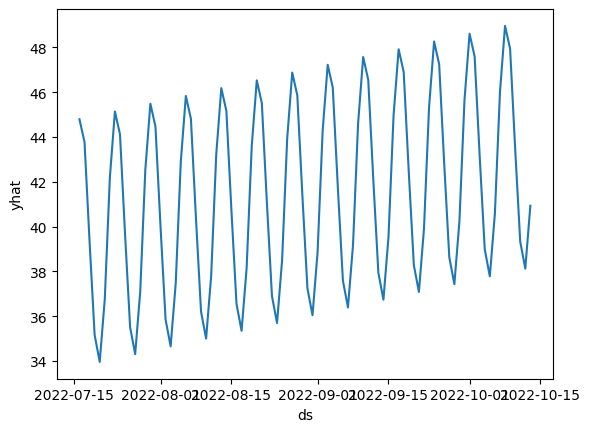

In [ ]:
sns.lineplot(x = 'ds', y = 'yhat', data = forecast)